FOLD 1 DID CONVERGE

In [2]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
import pickle

In [3]:
# FILE LOCATION OF DATA
project_folder = r'C:\Users\giova\Documents\School\Classes\Spring 2025\Capstone Project\Football2024'
data_folder_loc = r'C:\Users\giova\Documents\School\Classes\Spring 2025\Capstone Project\Data'

folds_file = r'\folds_data.csv'

In [4]:
# READ DATA
folds_df = pd.read_csv(project_folder + folds_file)

In [5]:
folds_df['FAN_PHONE_MARKETABLE1'] = (folds_df['FAN_PHONE_MARKETABLE'] == 1).astype(int)
folds_df['HAS_OPENED_EMAIL1'] = (folds_df['HAS_OPENED_EMAIL'] == 1).astype(int)
folds_df['HAS_DONATED1'] = (folds_df['HAS_DONATED'] == 1).astype(int)
folds_df['HAS_MADE_PURCHASE1'] = (folds_df['HAS_MADE_PURCHASE'] == 1).astype(int)
folds_df['DONATION_CURRENT_DONOR1'] = (folds_df['DONATION_CURRENT_DONOR'] == 1).astype(int)
folds_df['ISRESOLD1'] = (folds_df['ISRESOLD'] == 1).astype(int)
folds_df['TICKETING_CURRENTYEARSTM1'] = (folds_df['TICKETING_CURRENTYEARSTM'] == 1).astype(int)
folds_df['TICKETING_PREVSEASONSTM1'] = (folds_df['TICKETING_PREVSEASONSTM'] == 1).astype(int)
folds_df['FAN_POSTAL_MARKETABLE1'] = (folds_df['FAN_POSTAL_MARKETABLE'] == 1).astype(int)
folds_df['ISRESOLD1'] = (folds_df['ISRESOLD'] == 1).astype(int)

In [6]:
folds_df.head()

,GRMCONTACTID,EVENTNAME,SECTIONNAME,ROWNAME,SEAT,REVENUETOTAL,PLANCODE,ISMOBILE,RESOLDTOTALAMOUNT,ISATTENDED,...,fold,FAN_PHONE_MARKETABLE1,HAS_OPENED_EMAIL1,HAS_DONATED1,HAS_MADE_PURCHASE1,DONATION_CURRENT_DONOR1,ISRESOLD1,TICKETING_CURRENTYEARSTM1,TICKETING_PREVSEASONSTM1,FAN_POSTAL_MARKETABLE1
0,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. TIGERS,11,16,14,60.0,FB24,1,0.0,1,...,1,1,1,1,1,1,0,1,1,1
1,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. REBELS,11,16,15,70.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
2,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. TERRIERS,11,16,16,30.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
3,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. MONARCHS,11,16,14,35.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
4,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. REBELS,11,16,13,70.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1


In [7]:
fold1_train = folds_df[folds_df['fold'] != 1]
fold1_test = folds_df[folds_df['fold'] == 1]

In [8]:
fold2_train = folds_df[folds_df['fold'] != 2]
fold2_test = folds_df[folds_df['fold'] == 2]

In [9]:
fold3_train = folds_df[folds_df['fold'] != 3]
fold3_test = folds_df[folds_df['fold'] == 3]

In [10]:
fold4_train = folds_df[folds_df['fold'] != 4]
fold4_test = folds_df[folds_df['fold'] == 4]

In [11]:
fold5_train = folds_df[folds_df['fold'] != 5]
fold5_test = folds_df[folds_df['fold'] == 5]

In [12]:
import numpy as np

def predict_probability1(row):
    score = 2.548388  # Intercept

    # Individual features
    score += -0.086505 * row.get('DONATION_CURRENT_DONATION_AMOUNT', 0)
    score += 0.328067 * row.get('FAN_PHONE_MARKETABLE1', 0)
    score += -0.640008 * row.get('TICKETING_CURRENTYEARSTM1', 0)
    score += 0.100717 * row.get('TICKETING_PREVSEASONSTM1', 0)
    score += 0.182217 * row.get('DONATION_CURRENT_DONOR1', 0)
    score += 0.016560 * row.get('HAS_OPENED_EMAIL1', 0)
    score += 0.132014 * row.get('HAS_DONATED1', 0)
    score += -0.003161 * row.get('HAS_MADE_PURCHASE1', 0)

    # Seating color coefficients
    seat_colors = {
        'Blue': 0.187617,
        'Garnet': 0.448777,
        'Gray': -0.013107,
        'Green': 0.072830,
        'Hot Pink': 0.166458,
        'Light Blue': 0.721361,
        'Lime Green': 0.793211,
        'Other': 0.989070,
        'Pink': 0.568961,
        'Purple': 0.763423,
        'Red': 0.165491,
        'Tan': 1.006753,
        'Teal': 0.199135,
        'White': 1.233678,
        'Yellow': 0.117081,
        'S': 0.666527,
        'WC': 0.845104,
        'LOG': 0.989070
    }
    for color, coef in seat_colors.items():
        score += coef * row.get(f'SEATING{color}', 0)

    # Initial lead source
    lead_sources = {
        'GamecocksMigration': 0.129340,
        'Salesforce': -0.076211,
        'SFMC': 0.021755,
        'Ticketmaster': 0.285198
    }
    for source, coef in lead_sources.items():
        score += coef * row.get(f'FAN_INITIAL_LEAD_SOURCE{source}', 0)

    # Last lead source
    last_sources = {
        'GamecocksMigration': -0.152478,
        'Salesforce': 0.048877,
        'SFMC': -0.096170,
        'Ticketmaster': -0.124717
    }
    for source, coef in last_sources.items():
        score += coef * row.get(f'FAN_LAST_LEAD_SOURCE{source}', 0)

    score += 0.009913 * row.get('FAN_POSTAL_MARKETABLE1', 0)
    score += 0.659949 * row.get('ISRESOLD1', 0)

    # Event names
    events = {
        'VS. MONARCHS': -0.769115,
        'VS. REBELS': -0.124534,
        'VS. TERRIERS': -0.780093,
        'VS. TIGERS': -0.122631,
        'VS. ZIPS': -0.703272
    }
    for event, coef in events.items():
        score += coef * row.get(f'EVENTNAME{event}', 0)

    # Plan codes
    plans = {
        'FB24-1': -0.743483,
        'GCFREE25': -1.600394,
        'Unknown/Not Specified': -0.248982
    }
    for plan, coef in plans.items():
        score += coef * row.get(f'PLANCODE{plan}', 0)

    # Additional features
    score += -0.683348 * row.get('TICKETING_TICKETS_SCANNED', 0)
    score += 0.272638 * row.get('TICKETING_TICKET_TOTAL_SPEND', 0)
    score += -0.091920 * row.get('TICKETING_STM_TENURE', 0)
    score += 0.240329 * row.get('TICKETING_GAMES_SOLD_SECONDARY', 0)
    score += 0.683807 * row.get('TICKETING_GAMES_SCANNED', 0)
    score += 0.005198 * row.get('TICKETING_GAMES_PURCHASED_SECONDARY', 0)
    score += 1.295385 * row.get('TICKETING_ATTENDANCE_SEASON_PCT', 0)
    score += -0.015182 * row.get('TICKETING_ATTENDANCE_LIFETIME_PCT', 0)
    score += 0.100415 * row.get('REVENUETOTAL', 0)
    score += -0.005747 * row.get('RESOLDTOTALAMOUNT', 0)
    score += -0.030961 * row.get('MERCH_TOTALSPENT_LIFETIME', 0)
    score += 0.011703 * row.get('MERCH_TOTALSPENT_90DAYS', 0)
    score += -0.064061 * row.get('MERCH_TOTALSPENT_365DAYS', 0)
    score += -0.015359 * row.get('MERCH_TOTALSPENT_30DAYS', 0)

    score += 0.036309 * row.get('FAN_UNIQUE_SOURCESYSTEM_COUNT', 0)
    score += -0.165952 * row.get('ENGAGEMENT', 0)
    score +=  -0.001578 * row.get('EMAIL_EMAIL_OPEN_PCT', 0)
    score +=  0.025711 * row.get('EMAIL_EMAIL_OPEN_COUNT', 0)
    score += 0.339530 * row.get('EMAIL_EMAIL_CLICK_PCT', 0)
    score += -0.025271 * row.get('DONATION_TOTAL_DONATION_AMOUNT', 0)
    score += -0.035904 * row.get('DONATION_MAX_DONATION_AMOUNT', 0)

    # Final prediction using sigmoid
    prob = 1 / (1 + np.exp(-score))
    return prob

In [13]:
# List of columns and their corresponding means and stds
normalize_info = {
    'REVENUETOTAL': (52.18195, 27.95407),
    'RESOLDTOTALAMOUNT': (7.523822, 37.16854),
    'TICKETING_STM_TENURE': (6.799748, 6.663743),
    'TICKETING_GAMES_SCANNED': (75.90588, 265.4672),
    'TICKETING_TICKETS_SCANNED': (781.0175, 3360.679),
    'TICKETING_GAMES_SOLD_SECONDARY': (3.950927, 18.49988),
    'TICKETING_GAMES_PURCHASED_SECONDARY': (0.5694115, 1.708901),
    'TICKETING_TICKET_TOTAL_SPEND': (295691.6, 715506.7),
    'DONATION_MAX_DONATION_AMOUNT': (4527.637, 37370.71),
    'DONATION_TOTAL_DONATION_AMOUNT': (68886.73, 330536.3),
    'DONATION_CURRENT_DONATION_AMOUNT': (67291.37, 231005),
    'EMAIL_EMAIL_OPEN_COUNT': (375.5622, 384.663),
    'MERCH_TOTALSPENT_30DAYS': (0.3968242, 7.709305),
    'MERCH_TOTALSPENT_90DAYS': (12.13054, 56.17089),
    'MERCH_TOTALSPENT_365DAYS': (30.75693, 107.3519),
    'MERCH_TOTALSPENT_LIFETIME': (124.1842, 337.3023),
    'EMAIL_OPEN_TIME_DIFF': (0.1138227, 6.005486),
    'DAYS_SINCE_LAST_DONATION': (179.4862, 528.0809),
    'DAYS_SINCE_LAST_PURCHASE': (190.833, 400.6599)
}

# Normalize each column
for col, (mean, std) in normalize_info.items():
    fold1_train.loc[:, col] = ((fold1_train[col].astype(float) - mean) / std)

C:\Users\giova\AppData\Local\Temp\ipykernel_30232\3537665955.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.57021227 -0.57021227 -0.57021227 ...  0.18011679  0.18011679
  0.18011679]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fold1_train.loc[:, col] = ((fold1_train[col].astype(float) - mean) / std)
C:\Users\giova\AppData\Local\Temp\ipykernel_30232\3537665955.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.26709846 -0.26709846 -0.26709846 ... -0.14278932 -0.14278932
 -0.14278932]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fold1_train.loc[:, col] = ((fold1_train[col].astype(float) - mean) / std)
C:\Users\giova\AppData\Local\Temp\ipykernel_30232\3537665955.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

In [14]:
fold1_train.loc[:, 'predicted_prob'] = fold1_train.apply(predict_probability1, axis=1)

C:\Users\giova\AppData\Local\Temp\ipykernel_30232\3778274896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold1_train.loc[:, 'predicted_prob'] = fold1_train.apply(predict_probability1, axis=1)


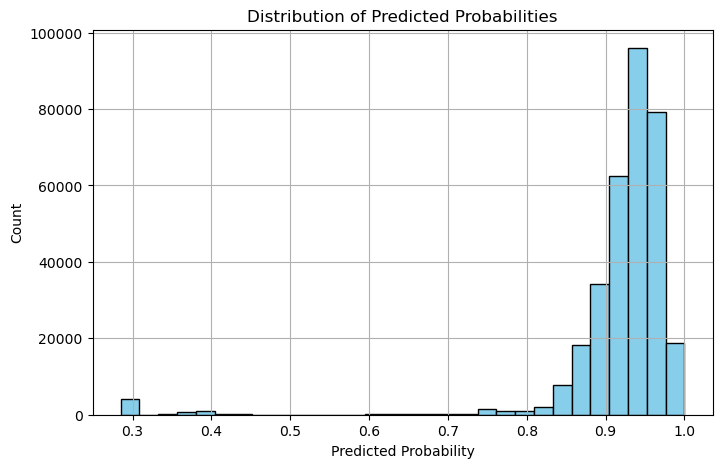

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fold1_train['predicted_prob'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

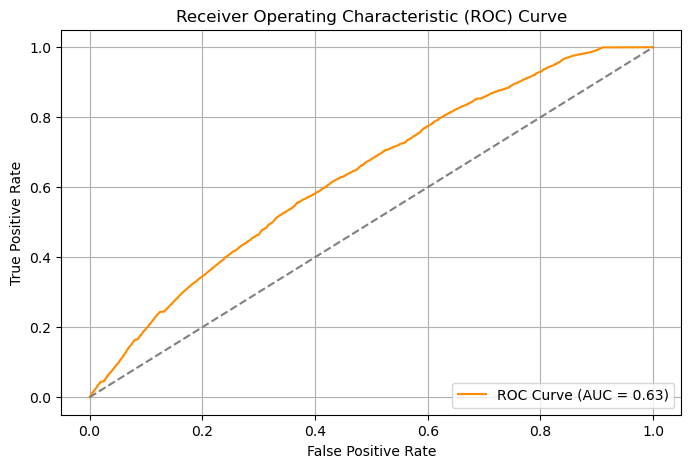

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# True labels and predicted probabilities
y_true = fold1_train['ISATTENDED']
y_scores = fold1_train['predicted_prob']

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute AUC
auc = roc_auc_score(y_true, y_scores)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [17]:
# Youden's J statistic
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best threshold based on Youden's J: {best_threshold:.4f}")

Best threshold based on Youden's J: 0.9354


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Create binary predictions
threshold = 0.8
fold1_train['predicted_label'] = (fold1_train['predicted_prob'] >= threshold).astype(int)

# Step 2: Get confusion matrix
cm = confusion_matrix(fold1_train['ISATTENDED'], fold1_train['predicted_label'])
cm

C:\Users\giova\AppData\Local\Temp\ipykernel_30232\275904166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold1_train['predicted_label'] = (fold1_train['predicted_prob'] >= threshold).astype(int)


array([[  5136,  37704],
       [  4867, 281129]], dtype=int64)

In [19]:
accuracy_score(fold1_train['ISATTENDED'], fold1_train['predicted_label'])

0.8705403301341702

In [20]:
fold1_test.loc[:, 'predicted_prob'] = fold1_test.apply(predict_probability1, axis=1)

C:\Users\giova\AppData\Local\Temp\ipykernel_30232\189566008.py:108: RuntimeWarning: overflow encountered in exp
  prob = 1 / (1 + np.exp(-score))
C:\Users\giova\AppData\Local\Temp\ipykernel_30232\1741160907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold1_test.loc[:, 'predicted_prob'] = fold1_test.apply(predict_probability1, axis=1)


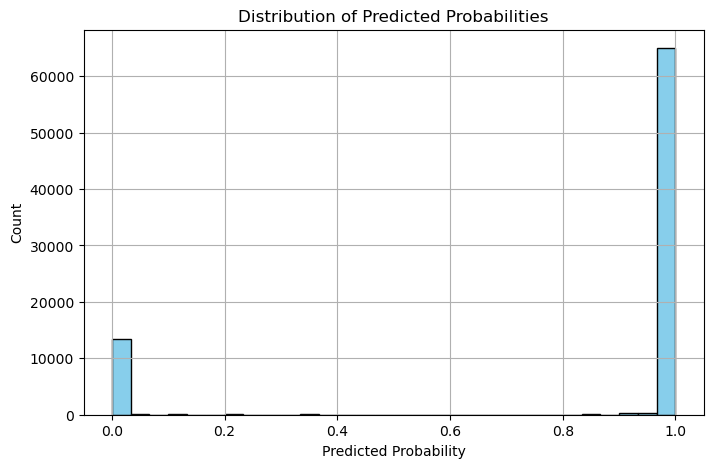

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fold1_test['predicted_prob'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [22]:
fold1_test['predicted_label'] = (fold1_test['predicted_prob'] >= threshold).astype(int)

# Step 2: Get confusion matrix
cm = confusion_matrix(fold1_test['ISATTENDED'], fold1_test['predicted_label'])
cm

C:\Users\giova\AppData\Local\Temp\ipykernel_30232\157174691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold1_test['predicted_label'] = (fold1_test['predicted_prob'] >= threshold).astype(int)


array([[ 2143,  6974],
       [11742, 58640]], dtype=int64)

In [23]:
accuracy_score(fold1_test['ISATTENDED'], fold1_test['predicted_label'])

0.764575655039686